In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten



In [2]:
data = pd.read_csv('./NFL.csv')
data.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,Yes
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,Yes
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,Yes
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,Yes
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,Yes


In [3]:
#First we want to check to ensure that there are no duplicates in the player column. 
print(data['Player'].value_counts())
print('We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. ')
data[data['Player'] == 'Chris Jones'] 

Player
Chris Jones                  2
Beanie Wells\WellCh00        1
Sam Swank                    1
Michael Bennett\BennMi99     1
Kahlil Bell\BellKa00         1
                            ..
Alfred Blue\BlueAl00         1
Xavier Su'a-Filo\Sua-Xa00    1
Jeoffrey Pagan\PagaJe00      1
Jadeveon Clowney\ClowJa00    1
Nasir Adderley               1
Name: count, Length: 3476, dtype: int64
We can see that there are 2 players that are listed as Chris Jones. It is important to make sure that the same entry was not made twice. 


,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
3029,2015,Chris Jones,NaN,Alabama,1.7780,82.553811,4.63,82.55,8.0,302.26,6.91,4.19,NaN,26.114013,offense,backs_receivers,WR,No
3347,2018,Chris Jones,NaN,Nebraska,1.8288,88.450512,4.57,NaN,14.0,NaN,NaN,NaN,NaN,26.446483,defense,defensive_back,CB,No


In [4]:
print(data['Drafted'].value_counts())


Drafted
Yes    2254
No     1223
Name: count, dtype: int64


In [5]:
print(data['Year'].value_counts())

Year
2014    333
2013    332
2011    329
2016    329
2009    327
2017    327
2010    326
2012    324
2015    322
2018    308
2019    220
Name: count, dtype: int64


In [6]:
# For our model we will need to convert the drafted values to Binary. 

data['Drafted'] = data['Drafted'].map({'Yes': 1, 'No': 0}).astype('int')
data.head()



,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Agility_3cone,Shuttle,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,NaN,NaN,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,1
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,7.38,4.45,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,1
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,NaN,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,1
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,7.09,4.23,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,1
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,7.10,4.40,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,1


In [7]:
nan_counts = data.isna().sum()
nan_counts


Year                      0
Player                    0
Age                     550
School                    0
Height                    0
Weight                    0
Sprint_40yd             174
Vertical_Jump           697
Bench_Press_Reps        905
Broad_Jump              728
Agility_3cone          1217
Shuttle                1140
Drafted..tm.rnd.yr.    1223
BMI                       0
Player_Type               0
Position_Type             0
Position                  0
Drafted                   0
dtype: int64

In [8]:
data = data.drop(columns=['Agility_3cone', 'Shuttle'])

In [9]:
data.head()

,Year,Player,Age,School,Height,Weight,Sprint_40yd,Vertical_Jump,Bench_Press_Reps,Broad_Jump,Drafted..tm.rnd.yr.,BMI,Player_Type,Position_Type,Position,Drafted
0,2009,Beanie Wells\WellCh00,20.0,Ohio St.,1.8542,106.594207,4.38,85.09,25.0,325.12,Arizona Cardinals / 1st / 31st pick / 2009,31.004194,offense,backs_receivers,RB,1
1,2009,Will Davis\DaviWi99,22.0,Illinois,1.8796,118.387609,4.84,83.82,27.0,292.10,Arizona Cardinals / 6th / 204th pick / 2009,33.510073,defense,defensive_lineman,DE,1
2,2009,Herman Johnson\JohnHe23,24.0,LSU,2.0066,165.107623,5.50,NaN,21.0,NaN,Arizona Cardinals / 5th / 167th pick / 2009,41.005821,offense,offensive_lineman,OG,1
3,2009,Rashad Johnson\JohnRa98,23.0,Alabama,1.8034,92.079251,4.49,93.98,15.0,304.80,Arizona Cardinals / 3rd / 95th pick / 2009,28.312463,defense,defensive_back,FS,1
4,2009,Cody Brown\BrowCo96,22.0,Connecticut,1.8796,110.676538,4.76,92.71,26.0,304.80,Arizona Cardinals / 2nd / 63rd pick / 2009,31.327425,defense,line_backer,OLB,1


In [10]:
data[['Name', 'ID']] = data['Player'].str.split('\\', expand=True)
data.drop('Player', axis=1, inplace=True)

data.columns

Index(['Year', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump',
       'Drafted..tm.rnd.yr.', 'BMI', 'Player_Type', 'Position_Type',
       'Position', 'Drafted', 'Name', 'ID'],
      dtype='object')

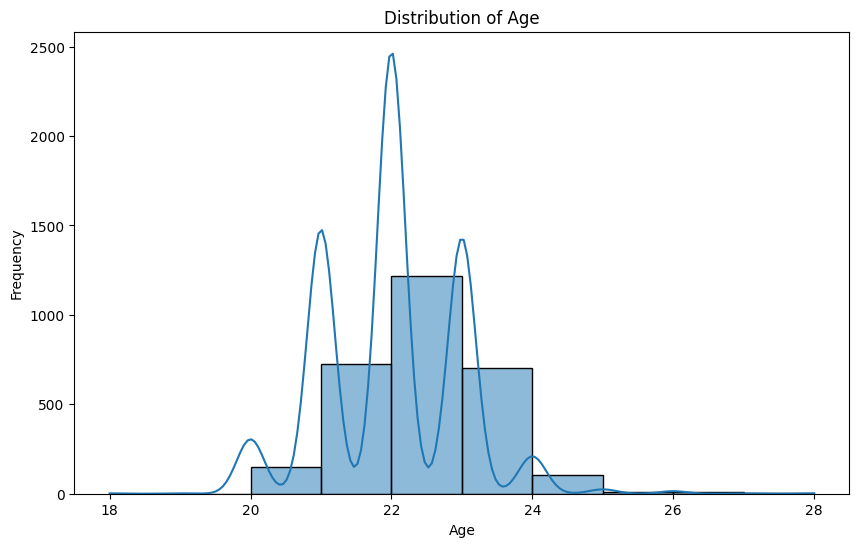

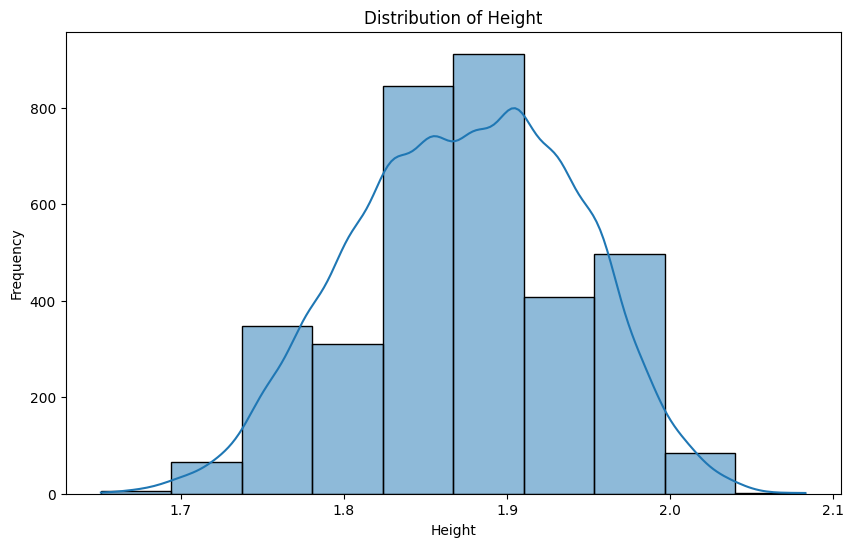

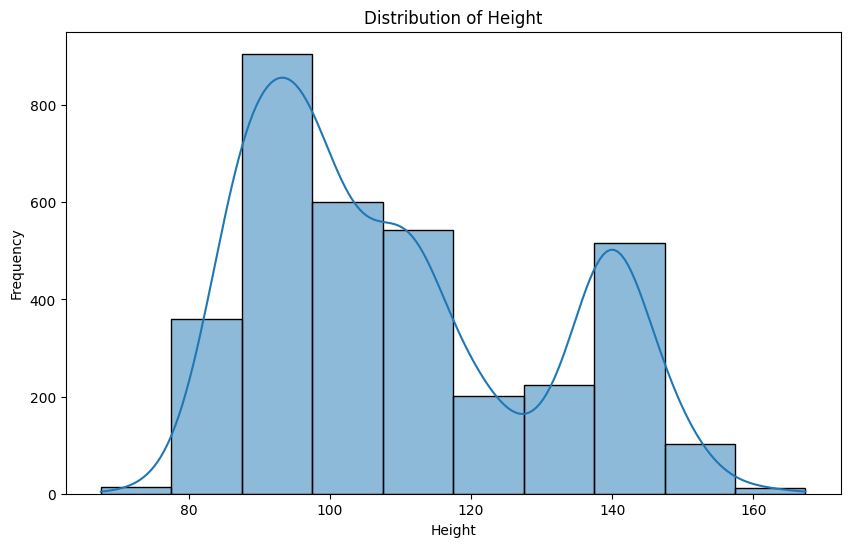

In [11]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Height
plt.figure(figsize=(10, 6))
sns.histplot(data['Height'], bins=10, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

# Distribution of Weight
plt.figure(figsize=(10, 6))
sns.histplot(data['Weight'], bins=10, kde=True)
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

C:\Users\Aditya Kumar\AppData\Local\Temp\ipykernel_26384\2298027967.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')


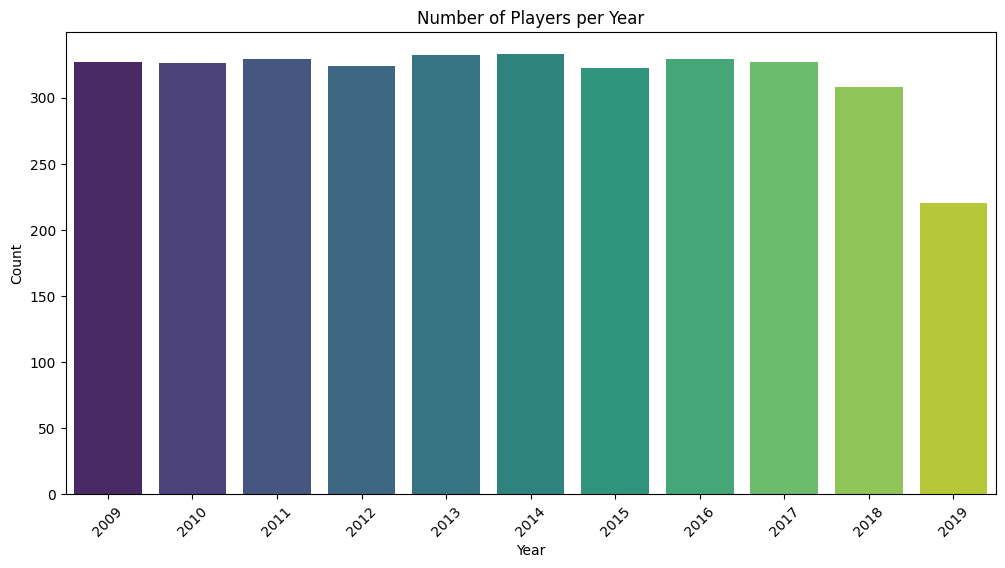

In [12]:

year_counts = data['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')
plt.title('Number of Players per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

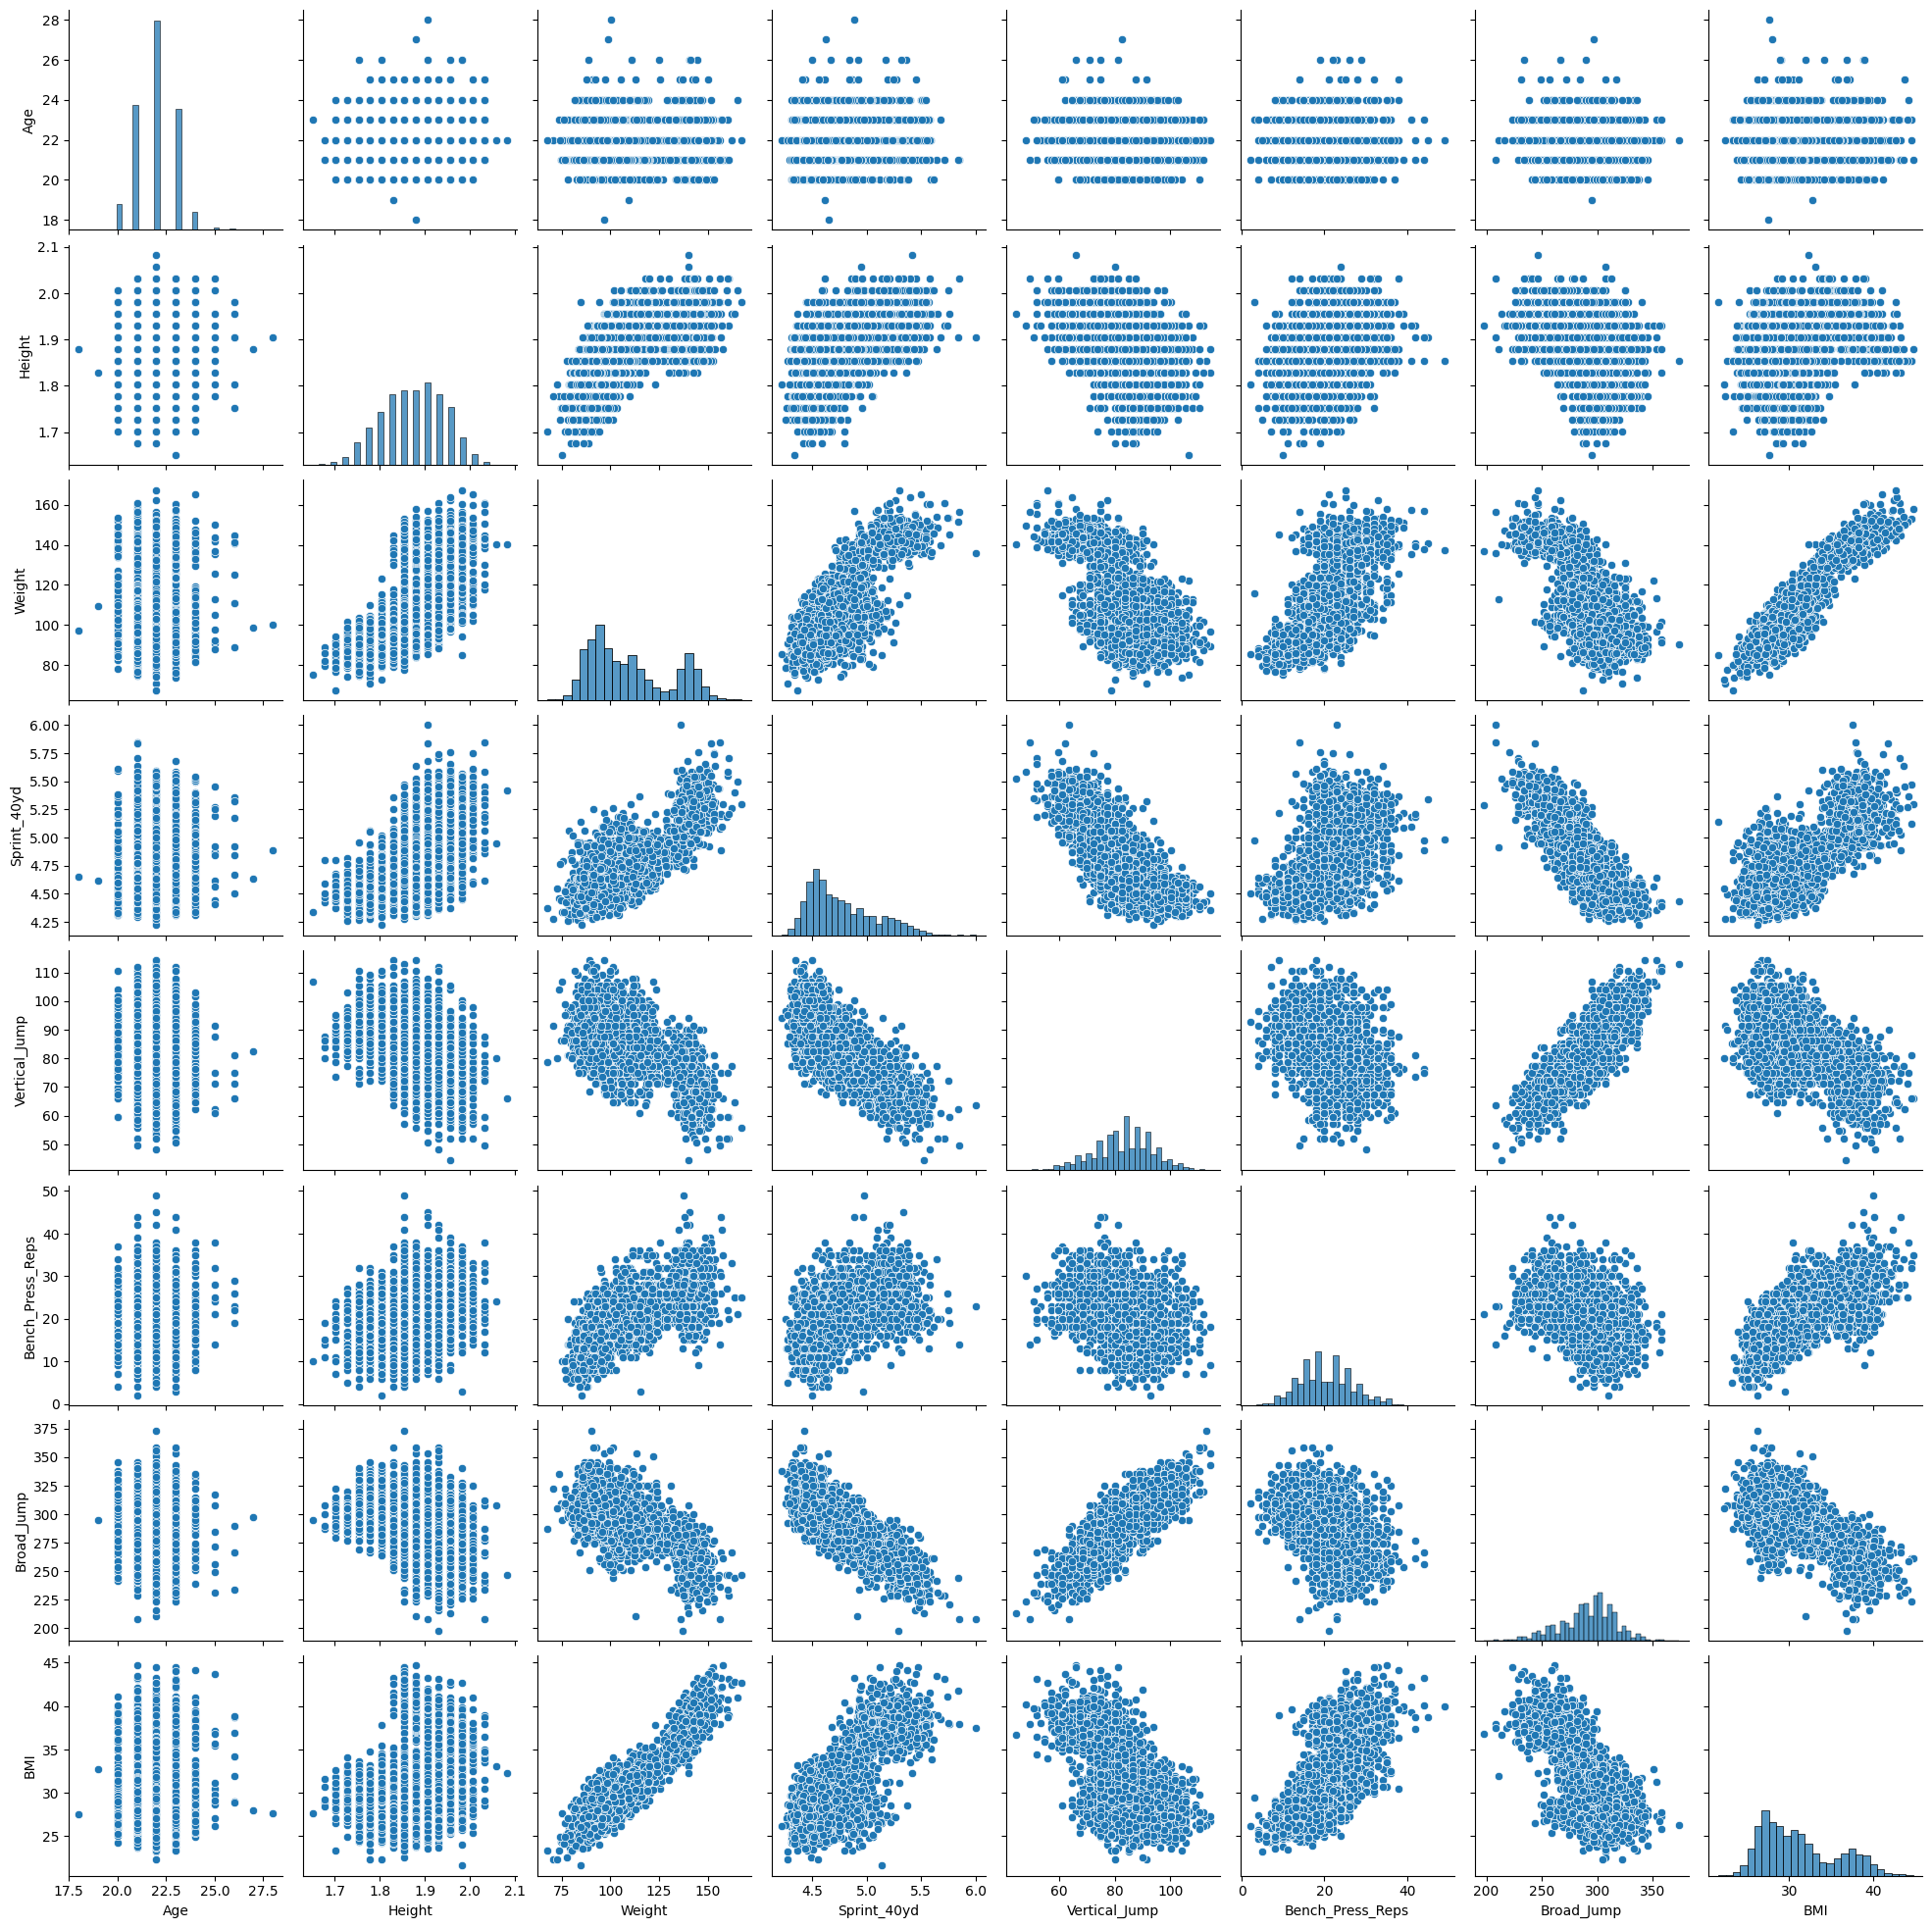

In [13]:
# Pair plot of numerical features
sns.pairplot(data[['Age', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'BMI']])
plt.show()

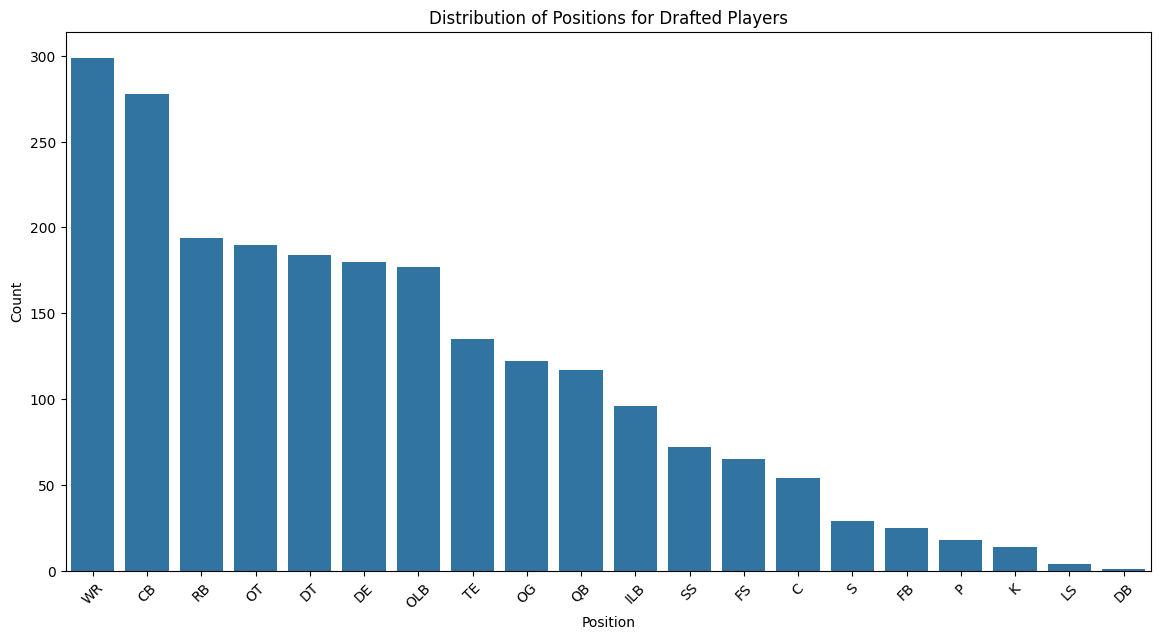

In [14]:
# Filter the data for drafted players
drafted_data = data[data['Drafted'] == 1]

# Bar plot of positions for drafted players
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', data=drafted_data, order=drafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Drafted Players')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

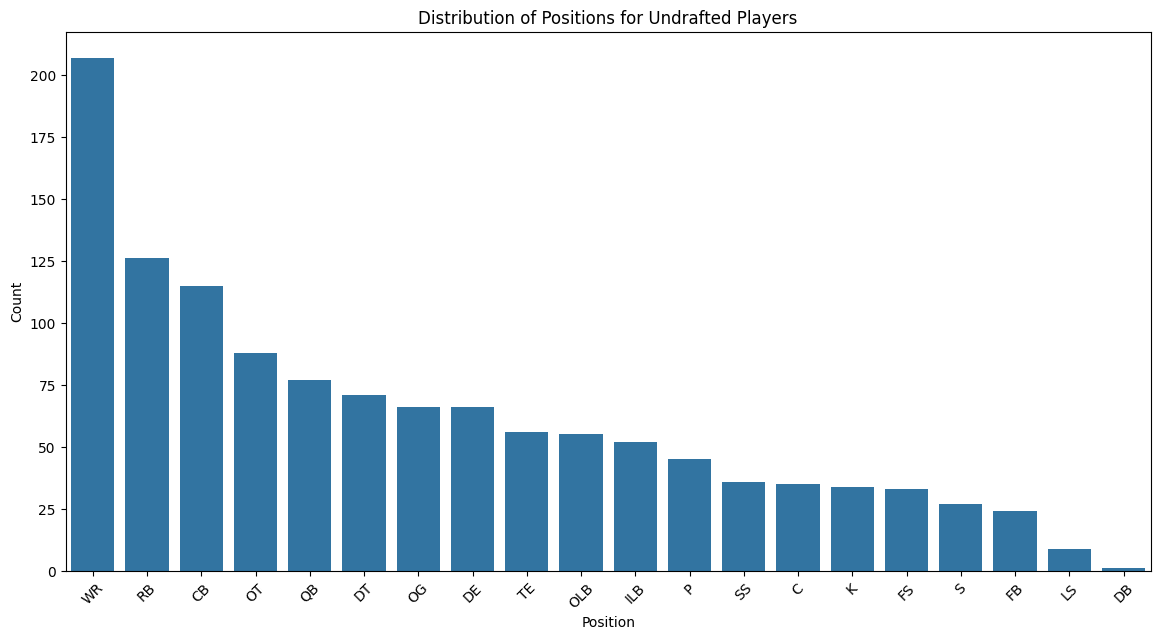

In [15]:
# Filter the data for drafted players
undrafted_data = data[data['Drafted'] == 0]

# Bar plot of positions for drafted players
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', data=undrafted_data, order=undrafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Undrafted Players')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

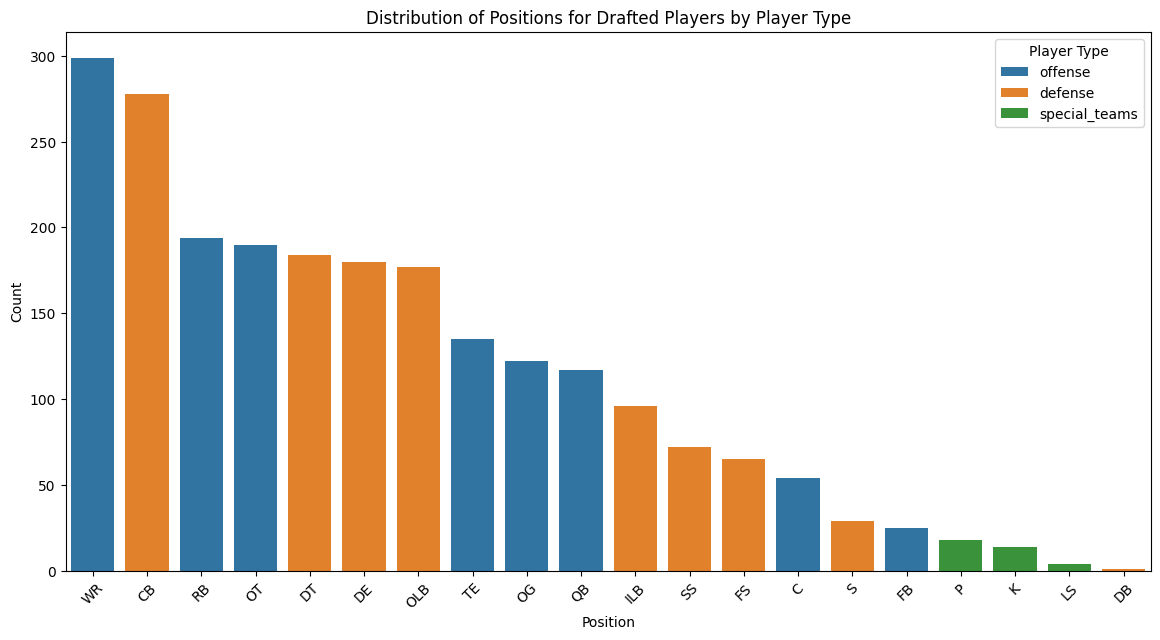

In [16]:
# Bar plot of positions for drafted players with player type
plt.figure(figsize=(14, 7))
sns.countplot(x='Position', hue='Player_Type', data=drafted_data, order=drafted_data['Position'].value_counts().index)
plt.title('Distribution of Positions for Drafted Players by Player Type')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Player Type')
plt.show()

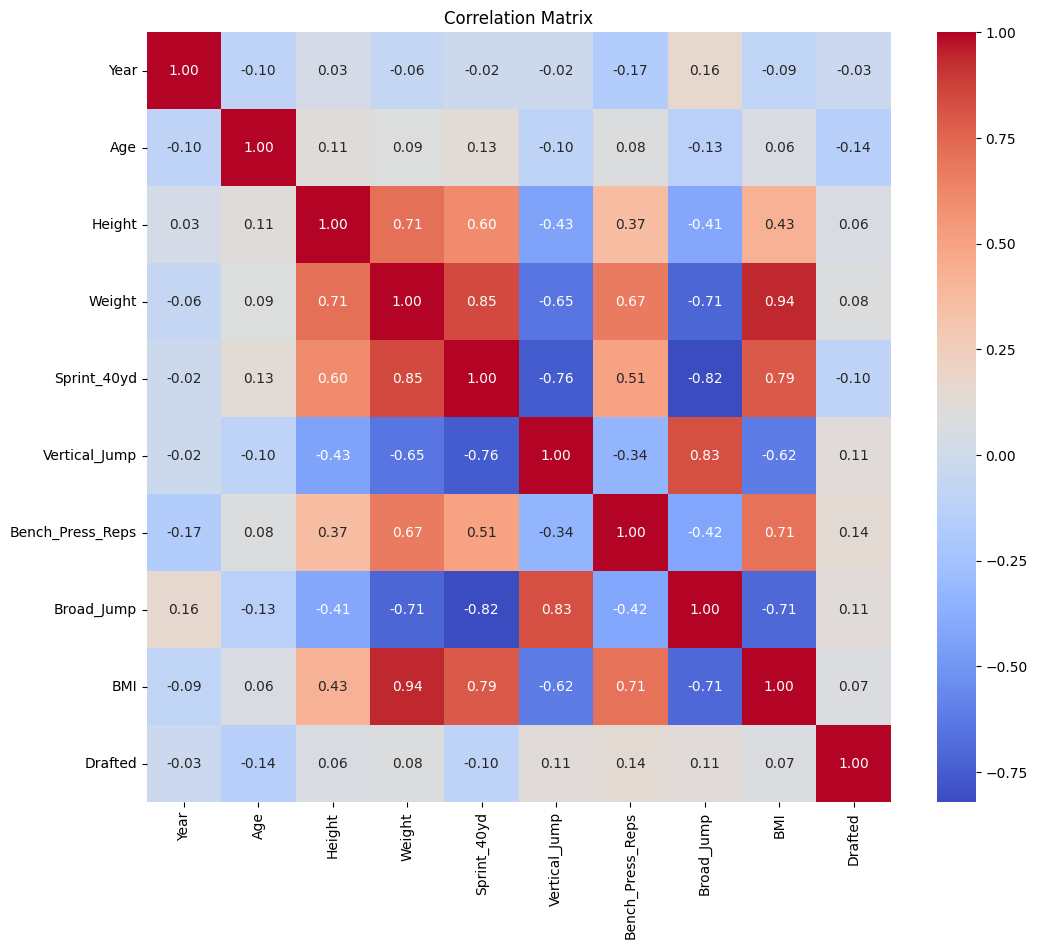

In [17]:
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


# Data Prep for Model

In [18]:
# Separate numeric and non-numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Fill missing numerical values with the median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

#Defining Categorical Columns (String based columns)
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

# Drop unnecessary columns
data.drop(['Drafted..tm.rnd.yr.'], axis=1, inplace=True)


In [19]:
#Increasing the number of samples
#Imported from Jenna Notebook
from sklearn.utils import resample
drafted = data[data['Drafted']==1]
not_drafted = data[data['Drafted']==0]
not_drafted_additional_samples = resample(not_drafted, replace=True, n_samples = len(drafted), random_state = 42)
new_data = pd.concat([drafted, not_drafted_additional_samples])

# Feature Selection

In [20]:
# Define features and target
X = new_data.drop(columns=['Drafted'])
y = new_data['Drafted']

In [21]:
# Split the data into train, validation, and test sets

#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#Jenna Version

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state= 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2524, 15)
Shape of X_val: (631, 15)
Shape of X_test: (1353, 15)
Shape of y_train: (2524,)
Shape of y_val: (631,)
Shape of y_test: (1353,)


In [22]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [23]:
y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat = to_categorical(y_val, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)


In [24]:
# Print the feature names used in the models
feature_names = data.drop(columns=['Drafted']).columns  # Drop the target column
print("Features used in the model:")
print(feature_names)

Features used in the model:
Index(['Year', 'Age', 'School', 'Height', 'Weight', 'Sprint_40yd',
       'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'BMI', 'Player_Type',
       'Position_Type', 'Position', 'Name', 'ID'],
      dtype='object')


# Building the model

## Model 1: Simple Neural Network

In [25]:
# Build a simple neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(2, activation='softmax')  # 2 classes: drafted and not drafted
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=32, validation_data=(X_val, y_val_cat),verbose=0)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)


# Make predictions
y_val_pred = model.predict(X_val)
y_val_pred_classes = y_val_pred.argmax(axis=1)
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)

# Model Summary
model.summary()

# Training accuracy (using the final epoch training accuracy from history)
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7832 - loss: 0.5782 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.7834 - loss: 0.5209


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,656 (108.04 KB)

 Trainable params: 9,218 (36.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,438 (72.03 KB)

Training Accuracy: 0.9635
Validation Accuracy: 0.7940
Test Accuracy: 0.7842


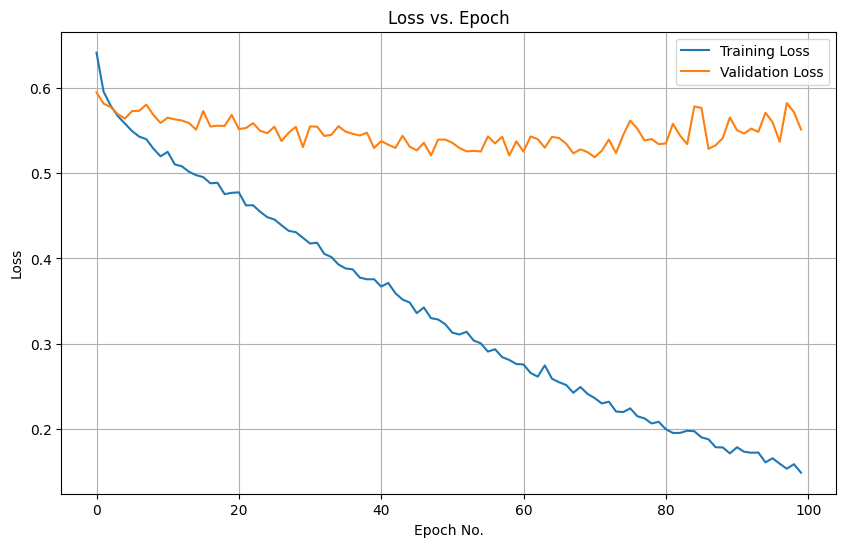

In [26]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
"""0. Numpy_review_AK.ipynb# Make predictions
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Combine the predictions with the actual labels and features for comparison
test_results = pd.DataFrame(X_test, columns=X.columns)
test_results['Actual'] = y_test
test_results['Predicted'] = y_test_pred_classes
test_results['Name'] = data.loc[test_results.index, 'Name']

test_results = test_results[['Name', 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results.sample(10))
"""

"0. Numpy_review_AK.ipynb# Make predictions\ny_test_pred = model.predict(X_test)\ny_test_pred_classes = y_test_pred.argmax(axis=1)\n\n# Combine the predictions with the actual labels and features for comparison\ntest_results = pd.DataFrame(X_test, columns=X.columns)\ntest_results['Actual'] = y_test\ntest_results['Predicted'] = y_test_pred_classes\ntest_results['Name'] = data.loc[test_results.index, 'Name']\n\ntest_results = test_results[['Name', 'Actual', 'Predicted']]\n\n# Print a sample of the results\nprint(test_results.sample(10))\n"

## Visualizing the predictions

In [28]:
# Ensure indices are reset to align correctly
X_test = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Make predictions
y_test_pred = model.predict(X_test)
y_test_pred_classes = y_test_pred.argmax(axis=1)

# Combine the predictions with the actual labels and features for comparison
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_test_pred_classes

# Assuming 'data' has the original indices
test_results['Name'] = data.iloc[test_results.index]['Name']

test_results = test_results[['Actual', 'Predicted']]

# Print a sample of the results
print(test_results.head(15))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        0          1
5        1          1
6        0          0
7        0          0
8        1          1
9        0          0
10       1          1
11       1          0
12       0          0
13       1          0
14       0          0


# Calculating the model accuracy

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Print Confusion Matrix and Classification Report
print("Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred_classes))

Test Set Evaluation
Confusion Matrix:
[[544 108]
 [184 517]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       652
           1       0.83      0.74      0.78       701

    accuracy                           0.78      1353
   macro avg       0.79      0.79      0.78      1353
weighted avg       0.79      0.78      0.78      1353


Accuracy Score:
0.7841832963784183


## Model 2: Logistic Regression

In [30]:
# Model 2 - Logistic Regression

# Initialize the logistic regression model
num_features = X_train.shape[1]
learning_rate = 0.01

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(
    units=1,        # output dim
    input_shape=(num_features,),  # input dim
    use_bias=True,               # use a bias (intercept) param
    activation='sigmoid',
    kernel_initializer=tf.keras.initializers.Ones(),  # initialize params to 1
    bias_initializer=tf.keras.initializers.Ones(),    # initialize bias to 1
))

# Choose an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Compile the model
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_val, y_val), verbose=0)

#Model Summary
model2.summary()

print("Evaluating the results now:")
# Evaluate the model on the training set
train_loss2, train_accuracy2 = model2.evaluate(X_train, y_train)
print(f"Training Accuracy: {train_accuracy2:.4f}")

# Evaluate the model on the validation set
val_loss2, val_accuracy2 = model2.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy2:.4f}")

# Evaluate the model on the test set
test_loss2, test_accuracy2= model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy2:.4f}")



c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18 (76.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Evaluating the results now:
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.6648 - loss: 0.6226
Training Accuracy: 0.6517
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - accuracy: 0.6823 - loss: 0.6043
Validation Accuracy: 0.6846
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.6352 - loss: 0.6478
Test Accuracy: 0.6386


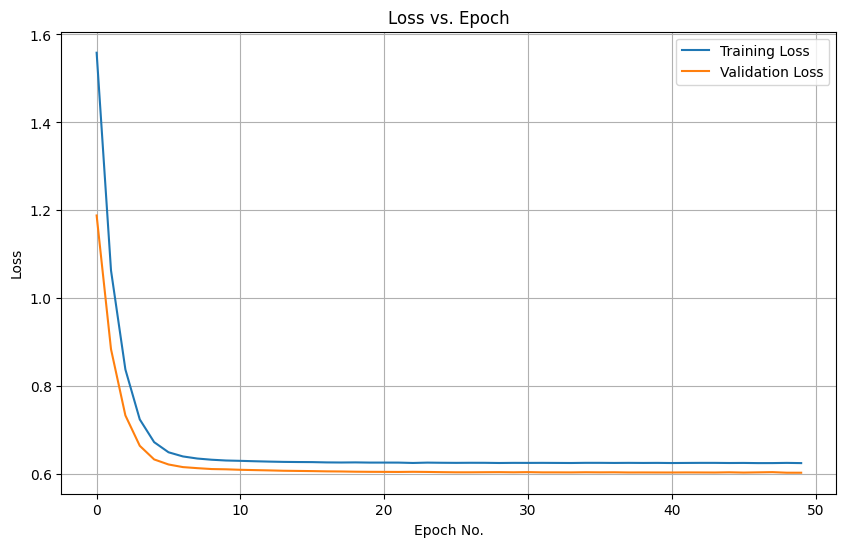

In [31]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
"""# Get the predicted probabilities for the test set
y_test_pred_prob2 = model2.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1)
y_test_pred2 = (y_test_pred_prob2 > 0.5).astype("int32")

# Combine the predictions with the actual labels and features for comparison
test_results2 = pd.DataFrame(X_test, columns=X.columns)
test_results2['Actual'] = y_test
test_results2['Predicted'] = y_test_pred2
test_results2 = test_results2[['Name', 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results2.sample(10))"""

'# Get the predicted probabilities for the test set\ny_test_pred_prob2 = model2.predict(X_test)\n\n# Convert predicted probabilities to class labels (0 or 1)\ny_test_pred2 = (y_test_pred_prob2 > 0.5).astype("int32")\n\n# Combine the predictions with the actual labels and features for comparison\ntest_results2 = pd.DataFrame(X_test, columns=X.columns)\ntest_results2[\'Actual\'] = y_test\ntest_results2[\'Predicted\'] = y_test_pred2\ntest_results2 = test_results2[[\'Name\', \'Actual\', \'Predicted\']]\n\n# Print a sample of the results\nprint(test_results2.sample(10))'

## Visualizing the predictions

In [33]:
# Ensure indices are reset to align correctly
X_test = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
y_test = pd.Series(y_test).reset_index(drop=True)

# Make predictions for model2
y_test_pred_prob2 = model2.predict(X_test)
y_test_pred_classes2 = (y_test_pred_prob2 > 0.5).astype("int32")

# Combine the predictions with the actual labels and features for comparison for model2
test_results2 = X_test.copy()
test_results2['Actual'] = y_test
test_results2['Predicted'] = y_test_pred_classes2

# Assuming 'data' has the original indices
test_results2['Name'] = data.iloc[test_results2.index]['Name']

# Select relevant columns
test_results2 = test_results2[['Actual', 'Predicted']]

# Print a sample of the results
print(test_results2.head(15))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
    Actual  Predicted
0        1          1
1        1          0
2        0          1
3        1          0
4        0          1
5        1          1
6        0          1
7        0          0
8        1          1
9        0          0
10       1          1
11       1          0
12       0          0
13       1          0
14       0          1


## calculating the accuracy

In [34]:
# Print Confusion Matrix and Classification Report
print("Test Set Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_classes2))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_classes2))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred_classes2))

Test Set Evaluation
Confusion Matrix:
[[428 224]
 [265 436]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       652
           1       0.66      0.62      0.64       701

    accuracy                           0.64      1353
   macro avg       0.64      0.64      0.64      1353
weighted avg       0.64      0.64      0.64      1353


Accuracy Score:
0.6385809312638581


## Extra Plots

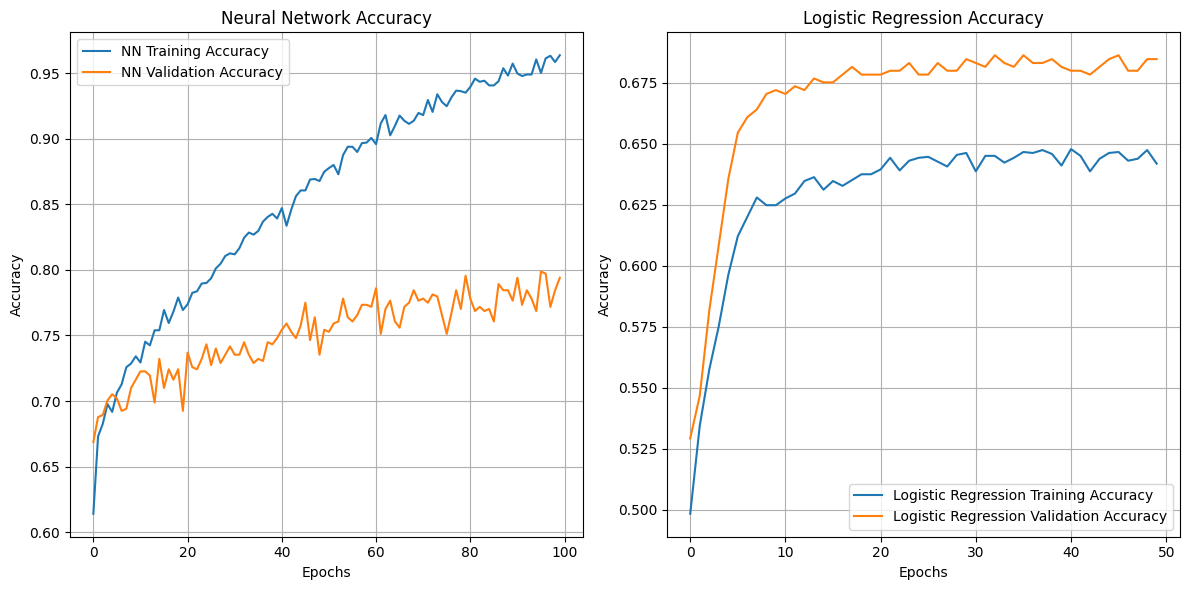

In [35]:
# Plotting the accuracies for both models
plt.figure(figsize=(12, 6))

# Neural Network Model
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='NN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='NN Validation Accuracy')
plt.title('Neural Network Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Logistic Regression Model
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Logistic Regression Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Logistic Regression Validation Accuracy')
plt.title('Logistic Regression Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

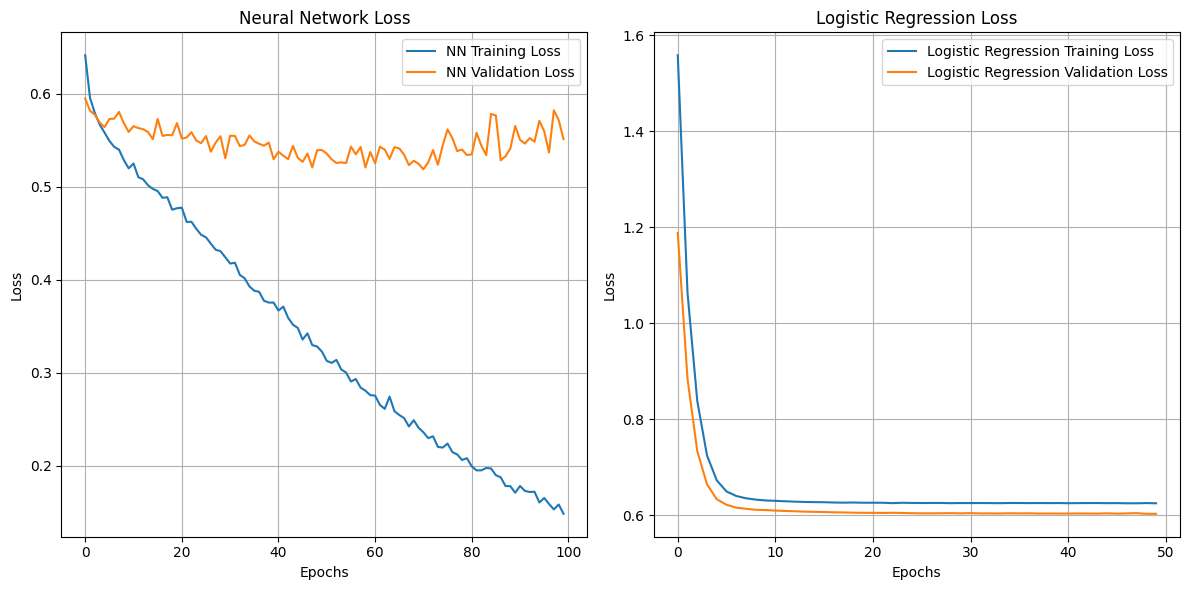

In [36]:
# Plotting the losses for both models
plt.figure(figsize=(12, 6))

# Neural Network Model
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='NN Training Loss')
plt.plot(history.history['val_loss'], label='NN Validation Loss')
plt.title('Neural Network Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Logistic Regression Model
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Logistic Regression Training Loss')
plt.plot(history2.history['val_loss'], label='Logistic Regression Validation Loss')
plt.title('Logistic Regression Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Model 3 - CNN

In [37]:
# Convert to NumPy arrays
X_train_np = np.array(X_train)
X_val_np = np.array(X_val)
X_test_np = np.array(X_test)

# Reshape the input data to be 3D
X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_val_reshaped = X_val_np.reshape((X_val_np.shape[0], X_val_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

model3 = Sequential([
    Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history3 = model3.fit(X_train_reshaped, y_train_cat, epochs=100, batch_size=64, validation_data=(X_val_reshaped, y_val_cat),verbose=0)

#Model Summary
model3.summary()

# Evaluate the model on the validation set
val_loss3, val_accuracy3 = model3.evaluate(X_val_reshaped, y_val_cat)

# Make predictions
y_test_pred3 = model3.predict(X_test_reshaped)
y_test_pred_classes3 = y_test_pred3.argmax(axis=1)

# Evaluate the model on the test set
test_loss3, test_accuracy3 = model3.evaluate(X_test_reshaped, y_test_cat)

# Training accuracy (using the final epoch training accuracy from history)
train_accuracy3 = history3.history['accuracy'][-1]

print(f"Training Accuracy: {train_accuracy3:.4f}")
print(f"Validation Accuracy: {val_accuracy3:.4f}")
print(f"Test Accuracy: {test_accuracy3:.4f}")

c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 512)        │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,305,288 (24.05 MB)

 Trainable params: 2,101,762 (8.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,203,526 (16.04 MB)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: 2.3719
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7835 - loss: 2.3932
Training Accuracy: 1.0000
Validation Accuracy: 0.8035
Test Accuracy: 0.7908


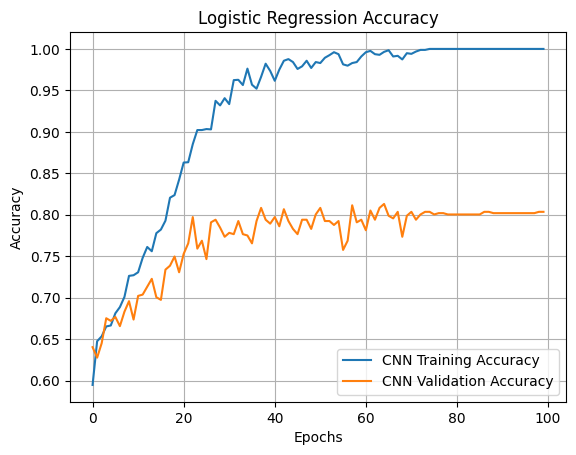

In [38]:
plt.plot(history3.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('Logistic Regression Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

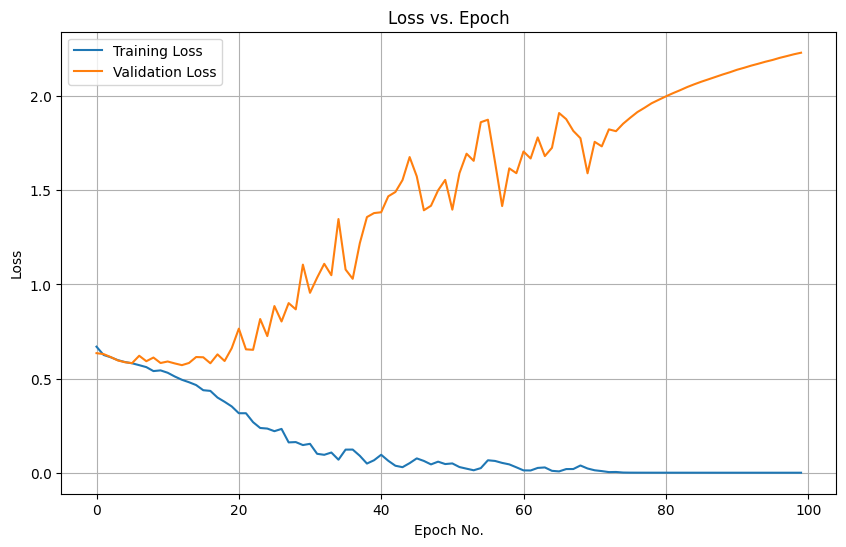

In [39]:
# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Combine the predictions with the actual labels and features for comparison
test_results3 = pd.DataFrame(X_test, columns=X.columns)
test_results3['Actual'] = y_test
test_results3['Predicted'] = y_test_pred_classes3
test_results3['Name'] = data.loc[test_results3.index, 'Name']

test_results3 = test_results3[[ 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results3.head(15))

    Actual  Predicted
0        1          1
1        1          1
2        0          0
3        1          1
4        0          0
5        1          1
6        0          0
7        0          0
8        1          1
9        0          0
10       1          1
11       1          0
12       0          0
13       1          0
14       0          0


In [41]:

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_test_pred_classes3)
precision = precision_score(y_test, y_test_pred_classes3)
recall = recall_score(y_test, y_test_pred_classes3)
f1 = f1_score(y_test, y_test_pred_classes3)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred_classes3))

Accuracy: 0.7908
Precision: 0.8472
Recall: 0.7275
F1 Score: 0.7828

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       652
           1       0.85      0.73      0.78       701

    accuracy                           0.79      1353
   macro avg       0.80      0.79      0.79      1353
weighted avg       0.80      0.79      0.79      1353



## Model 4 - Random Forest

In [42]:
# Initialize the Random Forest model
model4 = RandomForestClassifier(max_depth=15,random_state=42)

# Train the model
model4.fit(X_train, y_train)

# Make predictions
y_train_pred4 = model4.predict(X_train)
y_val_pred4 = model4.predict(X_val)
y_test_pred4 = model4.predict(X_test)

# Evaluate the model
train_accuracy4 = accuracy_score(y_train, y_train_pred4)
val_accuracy4 = accuracy_score(y_val, y_val_pred4)
test_accuracy4 = accuracy_score(y_test, y_test_pred4)

precision4 = precision_score(y_test, y_test_pred4)
recall4 = recall_score(y_test, y_test_pred4)
f1_score4 = f1_score(y_test, y_test_pred4)

# Print the evaluation results
print(f"Training Accuracy: {train_accuracy4:.4f}")
print(f"Validation Accuracy: {val_accuracy4:.4f}")
print(f"Test Accuracy: {test_accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1 Score: {f1_score4:.4f}")

# Confusion Matrix
conf_matrix4 = confusion_matrix(y_test, y_test_pred4)
print("Confusion Matrix:")
print(conf_matrix4)

Training Accuracy: 1.0000
Validation Accuracy: 0.8415
Test Accuracy: 0.8566
Precision: 0.8858
Recall: 0.8302
F1 Score: 0.8571
Confusion Matrix:
[[577  75]
 [119 582]]


c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [43]:
# Make predictions on the test set
y_test_pred4 = model4.predict(X_test)

# Combine the predictions with the actual labels and features for comparison
test_results4 = pd.DataFrame(X_test, columns=X.columns)
test_results4['Actual'] = y_test
test_results4['Predicted'] = y_test_pred4

# Assuming 'data' has the original indices
test_results4['Name'] = data.iloc[test_results4.index]['Name']

# Select relevant columns for display
test_results4 = test_results4[['Name', 'Actual', 'Predicted']]

# Print a sample of the results
print(test_results4.sample(15))

      Name  Actual  Predicted
1069   408       1          0
1161    96       0          0
1144   485       0          0
384   1113       0          0
283    145       0          1
400   1058       1          1
105   3173       0          0
747    733       0          0
155   2739       1          1
879   1137       1          0
699   3305       1          1
217    699       1          1
982    777       1          1
628   1445       1          0
318   1647       1          1


c:\Users\Aditya Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [44]:
# Feature importance
importances = model4.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
             Feature  Importance
14                ID    0.174772
5        Sprint_40yd    0.103466
13              Name    0.080403
9                BMI    0.075743
4             Weight    0.075147
1                Age    0.074216
2             School    0.068639
8         Broad_Jump    0.063853
6      Vertical_Jump    0.062036
7   Bench_Press_Reps    0.059619
3             Height    0.049695
0               Year    0.048372
12          Position    0.033255
11     Position_Type    0.016330
10       Player_Type    0.014454


In [45]:
# Create a dictionary to store the results
results = {
    'Model': ['Neural Network', 'Logistic Regression', 'CNN', 'Random Forest'],
    'Training Accuracy': [train_accuracy, train_accuracy2, train_accuracy3, train_accuracy4],
    'Validation Accuracy': [val_accuracy, val_accuracy2, val_accuracy3, val_accuracy4],
    'Test Accuracy': [test_accuracy, test_accuracy2, test_accuracy3, test_accuracy4]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

                 Model  Training Accuracy  Validation Accuracy  Test Accuracy
0       Neural Network           0.963550             0.793978       0.784183
1  Logistic Regression           0.651743             0.684628       0.638581
2                  CNN           1.000000             0.803487       0.790835
3        Random Forest           1.000000             0.841521       0.856615
